In [16]:
# Import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#My Functions

#Meshgrid to plot decision boundaries
#For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Z predicted on xx and yy matrices that np.c_ put in a form of (n,2)
def plot_decision(clf, xx, yy, cmap):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    _, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, cmap=cmap)
    return ax

In [3]:
# First task
dataset = load_wine()

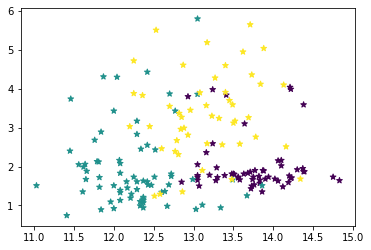

In [4]:
#Second task

#Feature 1:Alcohol
#Feature 2: Malic Acid
y = dataset.target
X = dataset.data[:, :2]

#Representation
plt.scatter(X[:,0], X[:,1], marker='*', c=y)
plt.show()

In [5]:
#Third task

#Splitting train - test
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#Splitting train-validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation, test_size=2/7, train_size=5/7, random_state=42)

#Checking
print(round(len(X_train)/len(X)*10))
print(round(len(X_test)/len(X)*10))
print(round(len(X_validation)/len(X)*10))

5
3
2


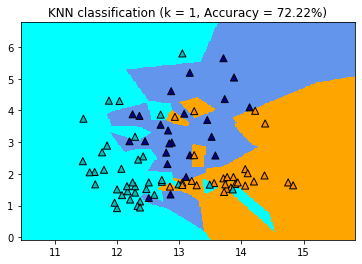

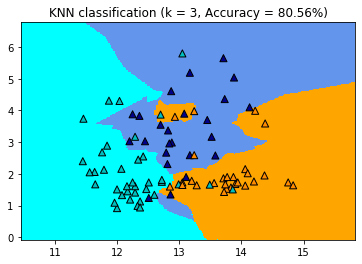

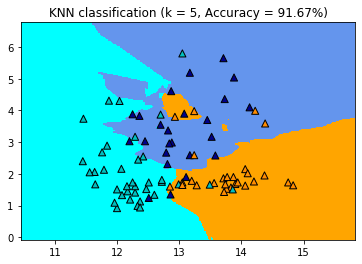

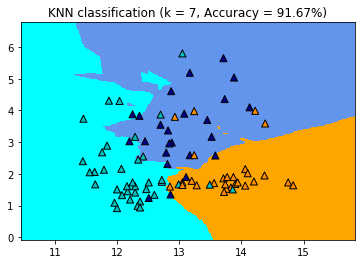

In [6]:
#Fourth task

#KNN and Accuracies lists
knns = {}
accuracies_knn = {}

 # Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

#Meshgrid
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
 
for k in np.arange(1,8,2): # [1,3,5,7]
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knns[k] = knn

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for validation dataset
    y_pred = knn.predict(X_validation)
    
    #Accuracy
    accuracies_knn[k] = accuracy_score(y_validation, y_pred)
       
    # Plot the decision boundary
    ax = plot_decision(knn,xx,yy,cmap_light)
    
   # Plot also the training points
    ax.scatter(X0, X1, c=y_train, cmap=cmap_bold, edgecolor='k', s=50, marker='^')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"KNN classification (k = {k}, Accuracy = {accuracies_knn[k]*100:.2f}%)")

    plt.show()

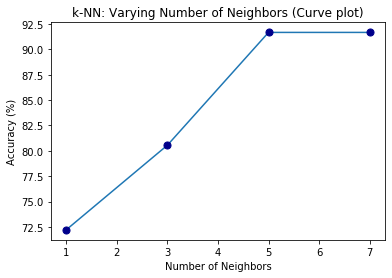

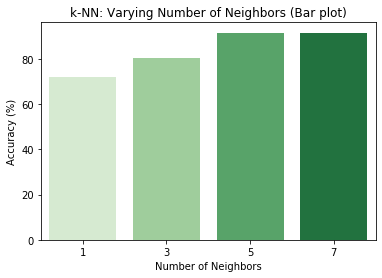

In [7]:
#Fifth task

# Curve plot k/accuracies
plt.figure()
plt.title('k-NN: Varying Number of Neighbors (Curve plot)')
plt.scatter(list(knns.keys()), np.array(list(accuracies_knn.values()))*100, s=50,c="darkblue")
plt.plot(list(knns.keys()), np.array(list(accuracies_knn.values()))*100, zorder=-1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')
plt.show()

# Bar plot k/accuracies
plt.figure()
plt.title('k-NN: Varying Number of Neighbors (Bar plot)')
plt.bar([str(k) for k in knns.keys()], np.array(list(accuracies_knn.values()))*100, color=(0.1,0.8,0.5,0.7))
sns.barplot([str(k) for k in knns.keys()], np.array(list(accuracies_knn.values()))*100, palette = "Greens")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')
plt.show()


In [8]:
#Seventh task
bestK = max(list(accuracies_knn.items()), key=lambda v: v[1])[0]
bestKNN = knns[bestK]

#Train the model using the training sets
bestKNN.fit(X_train_validation, y_train_validation)

#Predict the response for test dataset
y_pred = bestKNN.predict(X_test)

#Accuracy
print(f"Test accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")

Test accuracy: 79.63 %


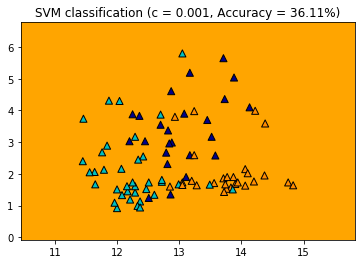

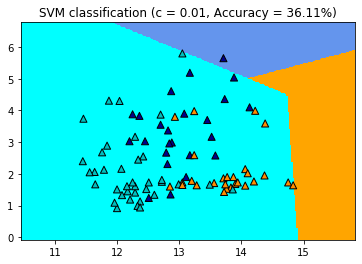

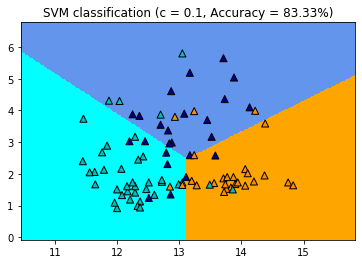

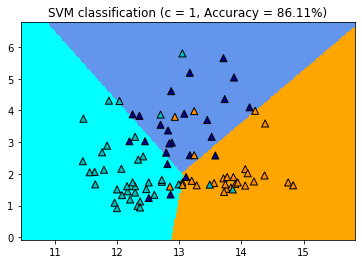

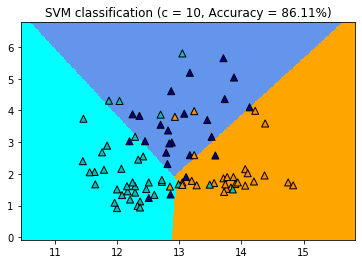

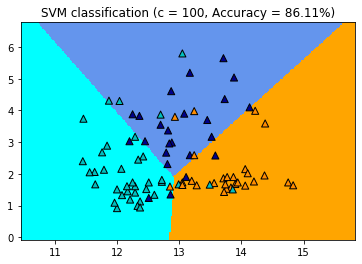

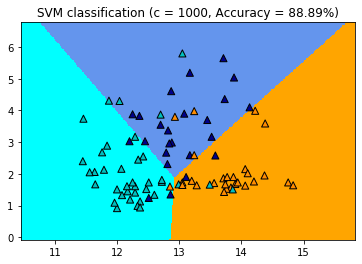

In [9]:
#Eighth
svms_linear = {}
accuracies_svm_linear = {}
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in Cs:
    
    #Create SVM Classifier (kernel=linear)
    svm = SVC(C=c, kernel="linear")
    svms_linear[c] = svm
    
    #Train the model using the training sets
    svm.fit(X_train, y_train)

    #Predict the response for validation dataset
    y_pred = svm.predict(X_validation)
    
    #Accuracy
    accuracies_svm_linear[c] = accuracy_score(y_validation, y_pred)
    
    #Plot decision boundary
    ax = plot_decision(svm,xx,yy,cmap_light)
    
    # Plot also the training points
    ax.scatter(X0, X1, c=y_train, cmap=cmap_bold, edgecolor='k', s=50, marker='^')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"SVM classification (c = {c}, Accuracy = {accuracies_svm_linear[c]*100:.2f}%)")

    plt.show()

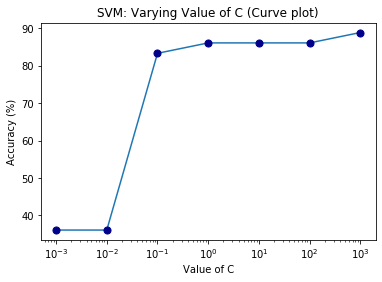

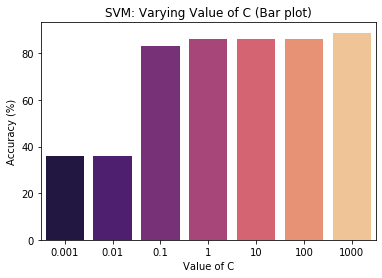

In [10]:
#Ninth task

# Curve plot k/accuracies
plt.figure()
plt.title('SVM: Varying Value of C (Curve plot)')
plt.scatter(list(svms_linear.keys()), np.array(list(accuracies_svm_linear.values()))*100, s=50,c="darkblue")
plt.plot(list(svms_linear.keys()), np.array(list(accuracies_svm_linear.values()))*100, zorder=-1)
plt.xlabel('Value of C')
plt.ylabel('Accuracy (%)')
plt.xscale("log")

# Bar plot k/accuracies
plt.figure()
plt.title('SVM: Varying Value of C (Bar plot)')
plt.bar([str(c) for c in svms_linear.keys()], np.array(list(accuracies_svm_linear.values()))*100, color=(0.1,0.8,0.5,0.7))
sns.barplot([str(c) for c in svms_linear.keys()], np.array(list(accuracies_svm_linear.values()))*100, palette = "magma")
plt.xlabel('Value of C')
plt.ylabel('Accuracy (%)')
plt.show()


In [11]:
#Eleventh task
bestC_linear = max(list(accuracies_svm_linear.items()), key=lambda v: v[1])[0]
bestSVM_linear = svms_linear[bestC_linear]

#Train the model using the training sets
bestSVM_linear.fit(X_train_validation, y_train_validation)

#Predict the response for test dataset
y_pred_linear = bestSVM_linear.predict(X_test)

#Accuracy
print(f"Test accuracy: {accuracy_score(y_test, y_pred_linear)*100:.2f} %")

Test accuracy: 74.07 %


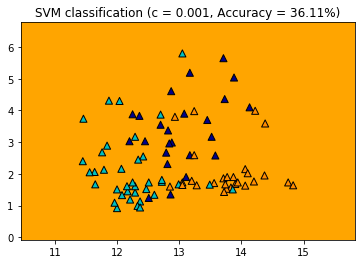

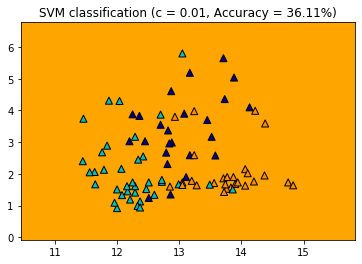

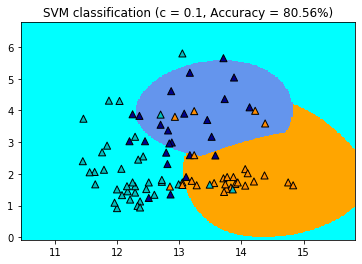

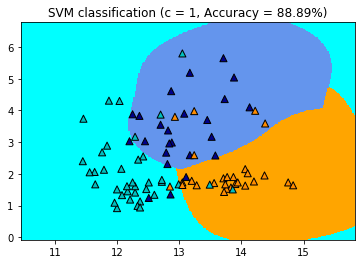

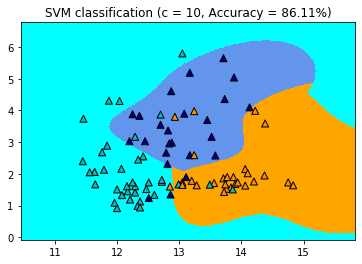

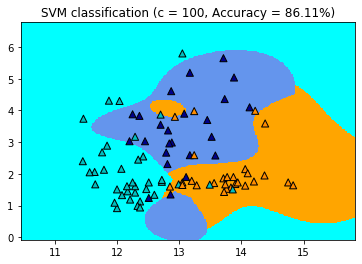

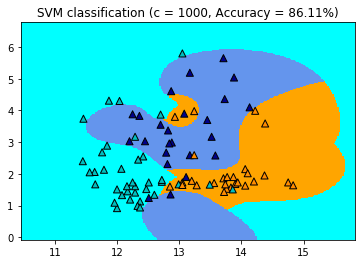

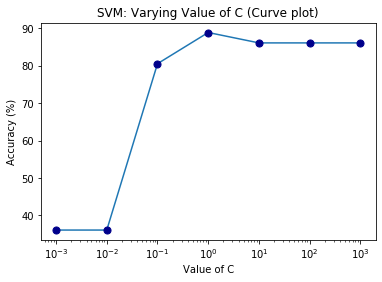

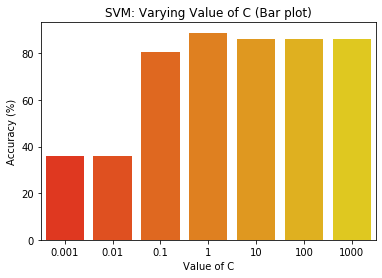

In [28]:
#Twelveth task
svms_rbf = {}
accuracies_svm_rbf = {}

for c in Cs:
    
    #Create SVM Classifier (kernel=linear)
    svm = SVC(C=c, kernel="rbf", gamma="auto")
    svms_rbf[c] = svm
    
    #Train the model using the training sets
    svm.fit(X_train, y_train)

    #Predict the response for validation dataset
    y_pred = svm.predict(X_validation)
    
    #Accuracy
    accuracies_svm_rbf[c] = accuracy_score(y_validation, y_pred)
    
    #Plot decision boundary
    ax = plot_decision(svm,xx,yy,cmap_light)
    
    # Plot also the training points
    ax.scatter(X0, X1, c=y_train, cmap=cmap_bold, edgecolor='k', s=50, marker='^')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"SVM classification (c = {c}, Accuracy = {accuracies_svm_rbf[c]*100:.2f}%)")
    plt.show()
    
# Curve plot c/accuracies
plt.figure()
plt.title('SVM: Varying Value of C (Curve plot)')
plt.scatter(list(svms_rbf.keys()), np.array(list(accuracies_svm_rbf.values()))*100, s=50,c="darkblue")
plt.plot(list(svms_rbf.keys()), np.array(list(accuracies_svm_rbf.values()))*100, zorder=-1)
plt.xlabel('Value of C')
plt.ylabel('Accuracy (%)')
plt.xscale("log")

# Bar plot c/accuracies
plt.figure()
plt.title('SVM: Varying Value of C (Bar plot)')
plt.bar([str(c) for c in svms_rbf.keys()], np.array(list(accuracies_svm_rbf.values()))*100, color=(0.1,0.8,0.5,0.7))
sns.barplot([str(c) for c in svms_rbf.keys()], np.array(list(accuracies_svm_rbf.values()))*100, palette = "autumn")
plt.xlabel('Value of C')
plt.ylabel('Accuracy (%)')
plt.show()

In [30]:
#Thirtheen task

bestC_rbf = max(list(accuracies_svm_rbf.items()), key=lambda v: v[1])[0]
bestSVM_rbf = svms_rbf[bestC_rbf]

#Train the model using the training sets
bestSVM_rbf.fit(X_train_validation, y_train_validation)

#Predict the response for test dataset
y_pred_rbf = bestSVM_rbf.predict(X_test)

#Accuracy
print(f"Test accuracy: {accuracy_score(y_test, y_pred_rbf)*100:.2f} %")

Test accuracy: 83.33 %


1